In [1]:
#DATA EXPLORATION

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import IsolationForest, RandomForestRegressor,GradientBoostingRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.isnull().sum().reindex()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
df.shape

(550068, 12)

In [10]:
df=df.head(1000)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1000170,P00111142,M,26-35,11,C,1,1,1,15.0,16.0,19696
996,1000170,P00113342,M,26-35,11,C,1,1,1,8.0,17.0,15745
997,1000171,P00100442,F,51-55,17,B,1,1,2,4.0,5.0,16018
998,1000172,P00346542,M,26-35,3,C,2,0,10,13.0,16.0,14070


<Axes: >

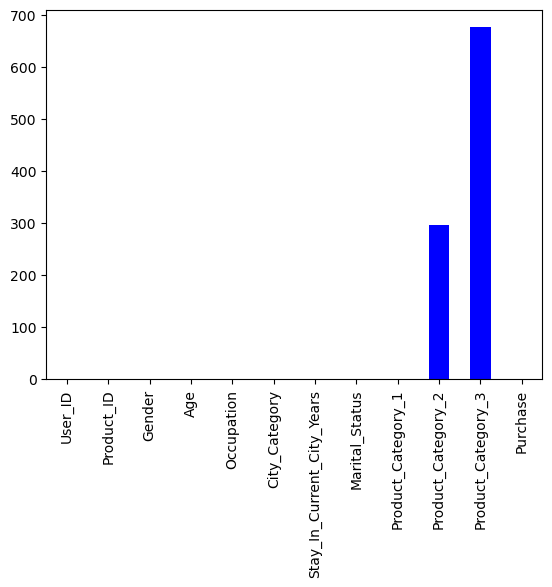

In [11]:
df.isnull().sum().plot(kind='bar',color='blue')

<Axes: xlabel='Gender', ylabel='Count'>

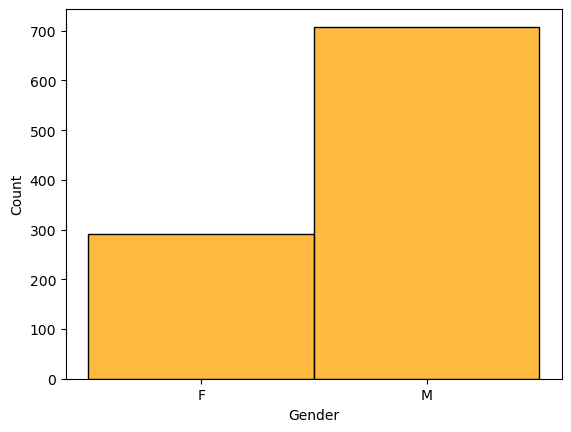

In [12]:
sns.histplot(df['Gender'],color='orange')

In [13]:
df.nunique()

User_ID                       161
Product_ID                    708
Gender                          2
Age                             7
Occupation                     21
City_Category                   3
Stay_In_Current_City_Years      5
Marital_Status                  2
Product_Category_1             16
Product_Category_2             16
Product_Category_3             15
Purchase                      950
dtype: int64

DATA CLEANING

In [14]:
P2_unique_values = df.Product_Category_2.dropna().unique()
P3_unique_values = df.Product_Category_3.dropna().unique()

df['Product_Category_2'].fillna(np.random.choice(df['Product_Category_2'].dropna()), inplace=True)
df['Product_Category_3'].fillna(np.random.choice(df['Product_Category_3'].dropna()), inplace=True)

DATA TRANSFORMATION

In [15]:
df.Gender = df.Gender.replace("F", 0)
df.Gender = df.Gender.replace("M", 1)
df.Gender = df.Gender.astype("int64")

df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.replace("4+", 4)
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.astype("int64")

In [16]:
df.Age = df.Age.replace("0-17", 17)
df.Age = df.Age.replace("18-25", 25)
df.Age = df.Age.replace("26-35", 35)
df.Age = df.Age.replace("36-45", 45)
df.Age = df.Age.replace("46-50", 50)
df.Age = df.Age.replace("51-55", 55)
df.Age = df.Age.replace("55+", 60)
df.Age = df.Age.astype("int64")

In [17]:
df.Product_ID = df.Product_ID.str.replace("P00", "")
df.Product_ID = df.Product_ID.astype("int64")

df.Product_Category_2 = df.Product_Category_2.fillna(0)
df.Product_Category_3 = df.Product_Category_3.fillna(0)

df = pd.get_dummies(df, columns = ["City_Category"], prefix = ["City"])

In [18]:
df

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_A,City_B,City_C
0,1000001,69042,0,17,10,2,0,3,4.0,16.0,8370,True,False,False
1,1000001,248942,0,17,10,2,0,1,6.0,14.0,15200,True,False,False
2,1000001,87842,0,17,10,2,0,12,4.0,16.0,1422,True,False,False
3,1000001,85442,0,17,10,2,0,12,14.0,16.0,1057,True,False,False
4,1000002,285442,1,60,16,4,0,8,4.0,16.0,7969,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1000170,111142,1,35,11,1,1,1,15.0,16.0,19696,False,False,True
996,1000170,113342,1,35,11,1,1,1,8.0,17.0,15745,False,False,True
997,1000171,100442,0,55,17,1,1,2,4.0,5.0,16018,False,True,False
998,1000172,346542,1,35,3,2,0,10,13.0,16.0,14070,False,False,True


In [19]:
pd.DataFrame(abs(df.corr()["Purchase"]).sort_values(ascending = False)).iloc[1:]

,Purchase
Product_Category_1,0.384494
Product_Category_3,0.194410
City_A,0.101453
City_B,0.084737
Gender,0.055729
Product_ID,0.055293
Age,0.034076
Product_Category_2,0.022972
User_ID,0.021349
Stay_In_Current_City_Years,0.014995


In [20]:
df.drop(["Marital_Status", "City_B"], axis = 1, inplace = True)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_transformed = scaler.fit_transform(df)
df_transformed = pd.DataFrame(df_transformed)
df_transformed.columns = list(df)

<Axes: xlabel='Purchase', ylabel='Density'>

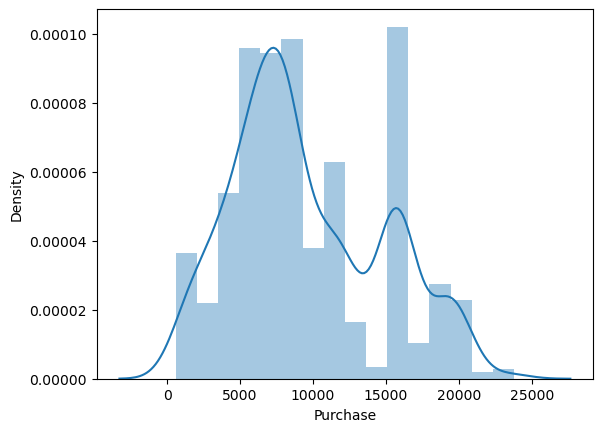

In [22]:
sns.distplot(df['Purchase'])

<Axes: xlabel='Purchase', ylabel='Count'>

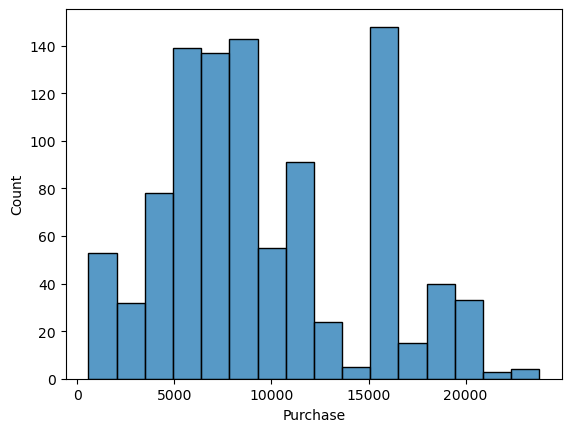

In [23]:
sns.histplot(df['Purchase'])

<Axes: xlabel='Gender', ylabel='Density'>

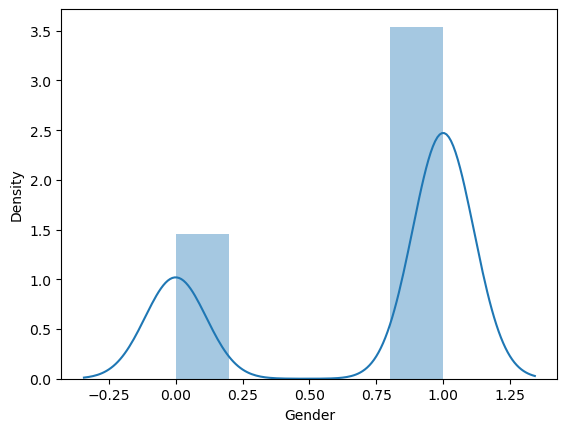

In [24]:
sns.distplot(df['Gender'])

<Axes: >

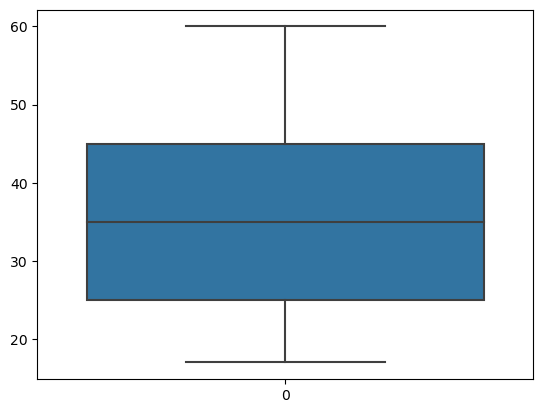

In [25]:
sns.boxplot(df['Age'])

<Axes: xlabel='Gender', ylabel='Age'>

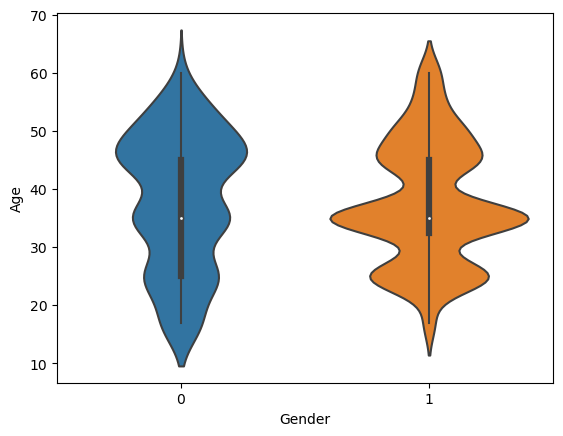

In [26]:
sns.violinplot(x='Gender',y ='Age',data=df)

<Axes: xlabel='Gender', ylabel='Age'>

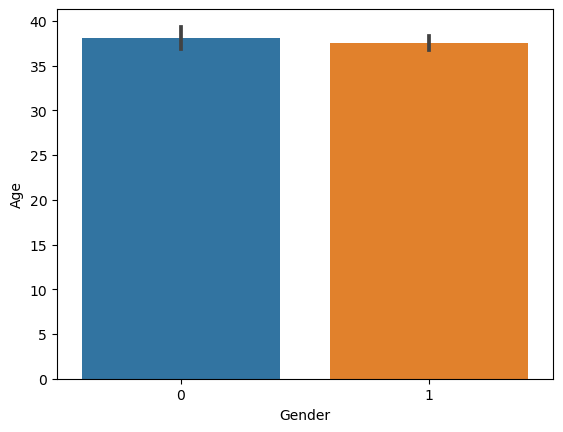

In [27]:
sns.barplot(x='Gender',y ='Age',data=df)

In [28]:
datacorr =df.corr()

<Axes: >

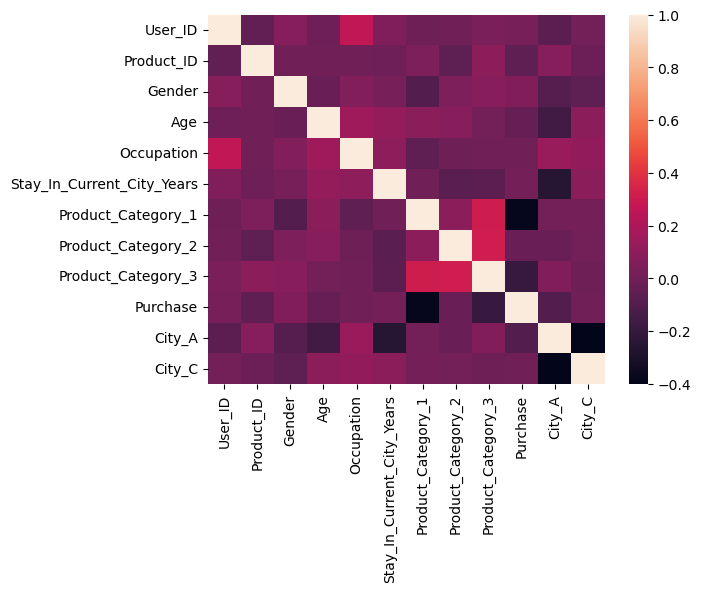

In [29]:
sns.heatmap((datacorr))

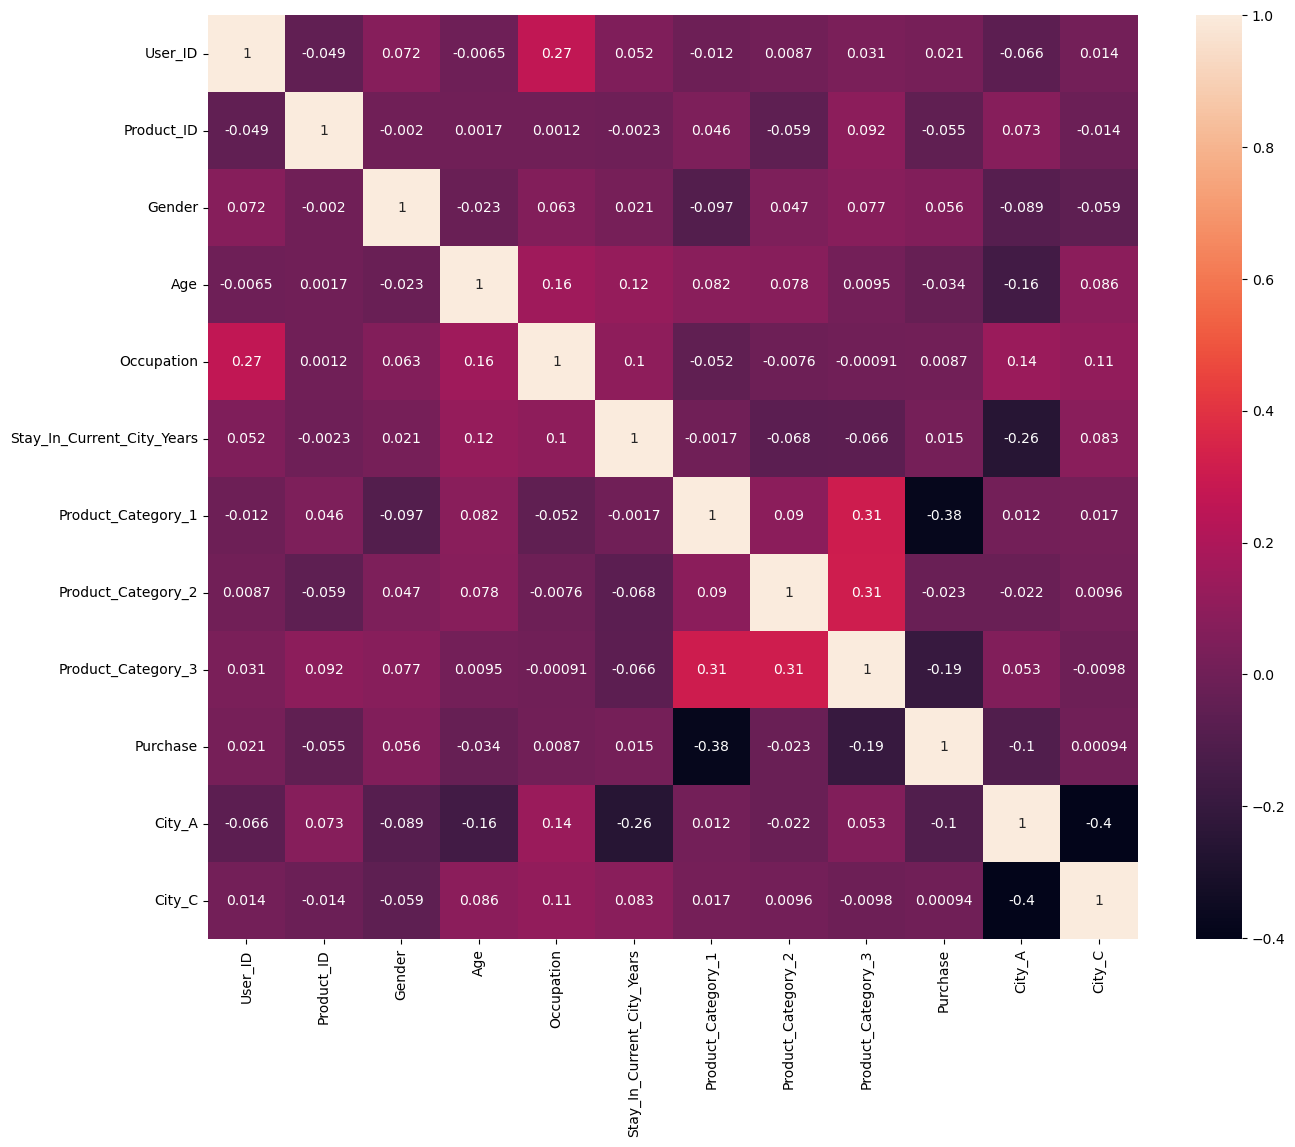

In [30]:
plt.figure(figsize=(15,12))
sns.heatmap(datacorr,annot=True)
plt.show()

In [31]:
x = df_transformed.drop(["Purchase"], axis = 1)
y = df["Purchase"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

SPLIT MODEL

In [32]:
split_models = {
    'Random_Forest_1': RandomForestRegressor(),
    'Decision_tree_1': DecisionTreeRegressor(),

}

In [33]:
def eval_model(y_true, y_pred):
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return mae, mse, r2

Training Model

In [34]:
from sklearn.metrics import mean_squared_error

def eval_model(y_true, y_pred):
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return mae, mse, r2

train_test_results = {}

for model_name, model in tqdm(split_models.items(), desc='Training Models'):
    model.fit(x_train, y_train.ravel())

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    trained_data_mae, trained_data_mse, trained_data_r2 = eval_model(y_train, y_train_pred)
    test_data_mae, test_data_mse, test_data_r2 = eval_model(y_test, y_test_pred)

    train_test_results[model_name] = {
        'Train': {
            'Train_MAE': trained_data_mae,
            'Train_R2': trained_data_r2,
            'Train_mse': trained_data_mse
        },
        'Test': {
            'Test_MAE': test_data_mae,
            'Test_R2': test_data_r2,
            'Test_mse': test_data_mse
        }
    }

Training Models: 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]


In [35]:
print('='*80)
print('{:<25s} {:<8s} {:<8s} {:<8s} {:<8s}'.format('Model', 'Train_MAE', 'Test_MAE', 'Train_R2', 'Test_R2'))
print('='*80)
for model_name, model_results in train_test_results.items():
    print('{:<25s} {:<9.3f} {:<9.3f} {:<9.3f} {:<9.3f}'.format(
        model_name,
        model_results['Train']['Train_MAE'],
        model_results['Test']['Test_MAE'],
        model_results['Train']['Train_R2'],
        model_results['Test']['Test_R2'],
    ))
print('='*80)

Model                     Train_MAE Test_MAE Train_R2 Test_R2 
Random_Forest_1           879.786   2713.315  0.944     0.562    
Decision_tree_1           0.000     3524.847  1.000     0.151    
